# Lab 02: Decision Tree
Group Members:
| **Student Name** | **Student ID** |
|:------------:|:----------:|
| Nguyễn Tấn Duy Anh | 22120015 |
| Bùi Hồng Phúc | 22120270 |
| Nguyễn Lê Anh Phúc | 22120276 |
| Hồ Minh Quang | 22120295 |

## Project Preparation
### Import libraries

In [28]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\anhphuc\anaconda3\lib\site-packages\huggingface_hub-0.26.2-py3.8.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [29]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: ucimlrepo in c:\users\anhphuc\anaconda3\lib\site-packages (0.0.7)



DEPRECATION: Loading egg at c:\users\anhphuc\anaconda3\lib\site-packages\huggingface_hub-0.26.2-py3.8.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [30]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\anhphuc\anaconda3\lib\site-packages\huggingface_hub-0.26.2-py3.8.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import graphviz
from scipy.sparse import coo_matrix
from sklearn import utils
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

### Import datasets

In [3]:
# Import dataset
from ucimlrepo import fetch_ucirepo

# Dataset 1
# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

print(breast_cancer_wisconsin_diagnostic.data.features.columns)

print(breast_cancer_wisconsin_diagnostic.data.targets.columns)

print(X.shape)
print(y.shape)
# # Dataset 2
# # Fetch dataset 
# wine_quality = fetch_ucirepo(id=186)
  
# # Data (as pandas dataframes)
# X = wine_quality.data.features
# y = wine_quality.data.targets
  
# # Metadata
# print(wine_quality.metadata)

# # Variable information
# print(wine_quality.variables)

# # Dataset 3 ???

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')
Index(['Diagnosis'], dtype='object')
(569, 30)
(569, 1)


## Dataset X (Binary class / Multi-class)
### Preparation

In [4]:
# Generate shuffled subsets
test_proportion = [0.4, 0.6, 0.8, 0.9]

subsets = []

for train_size in test_proportion:
    X_train,X_test,y_train,y_test = train_test_split(X,y, train_size= train_size,stratify= y,random_state=42)
    subsets.append((X_train,X_test,y_train,y_test))


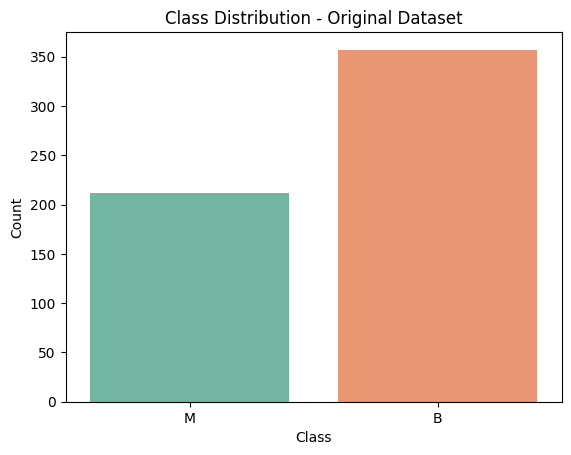

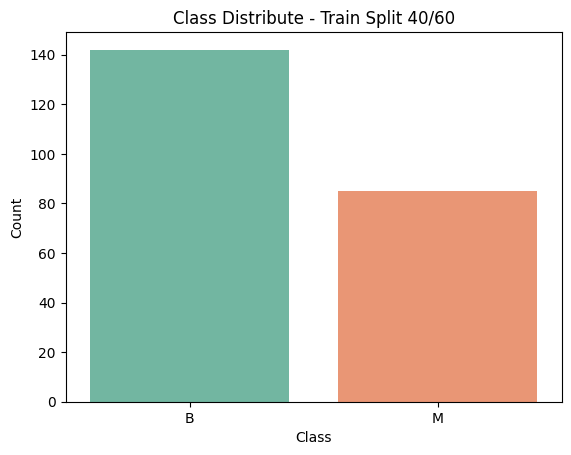

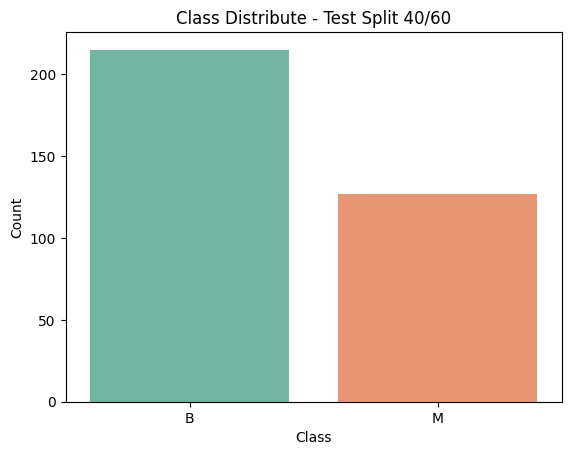

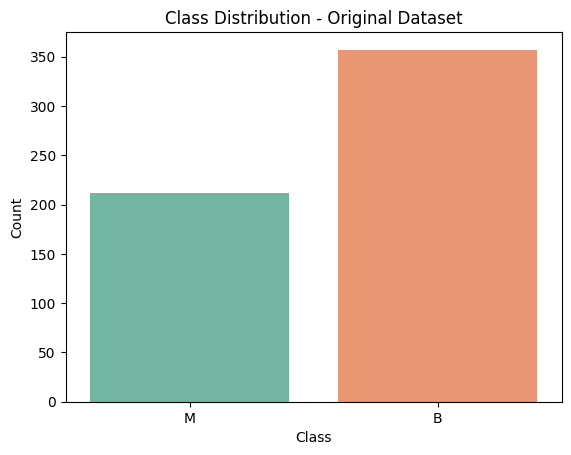

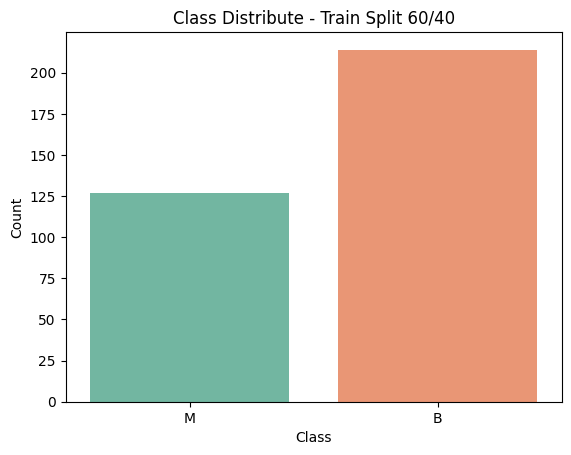

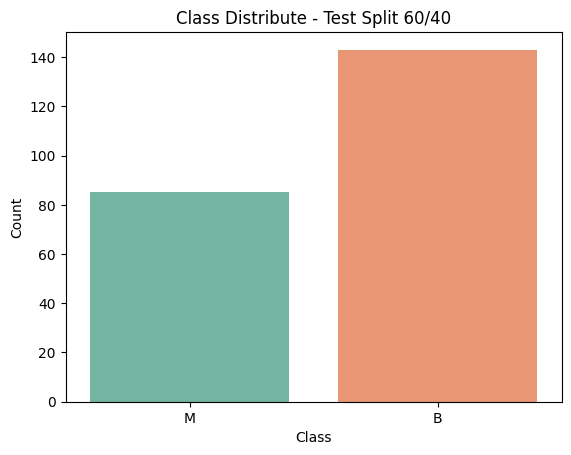

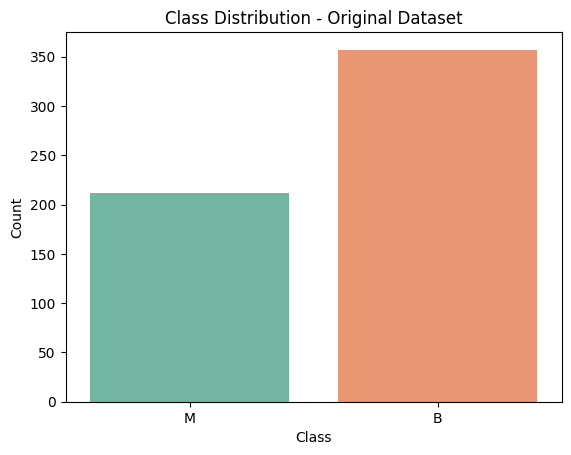

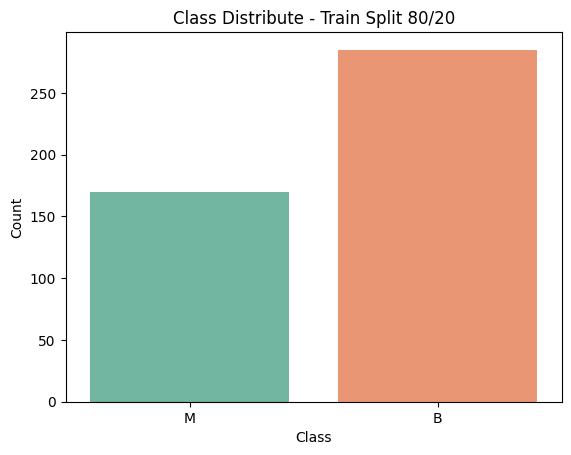

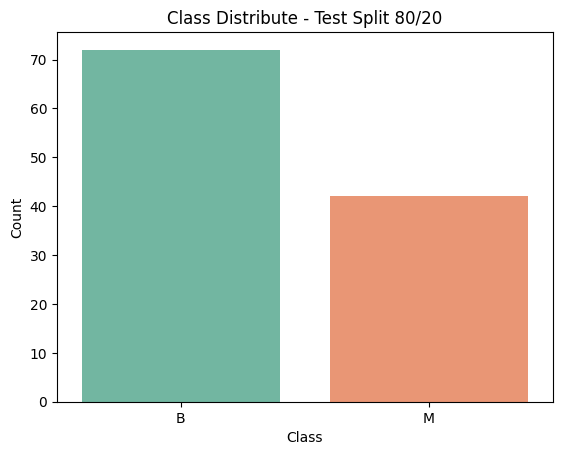

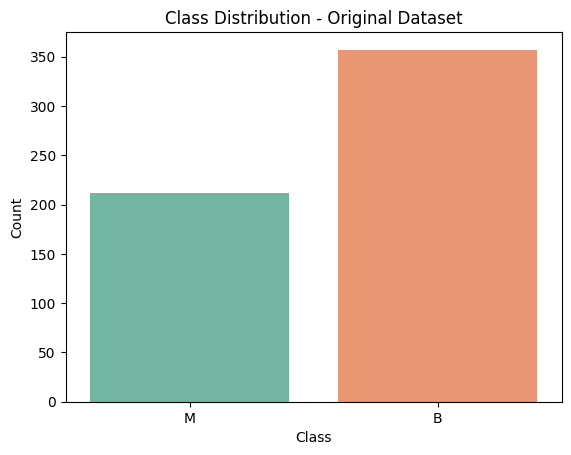

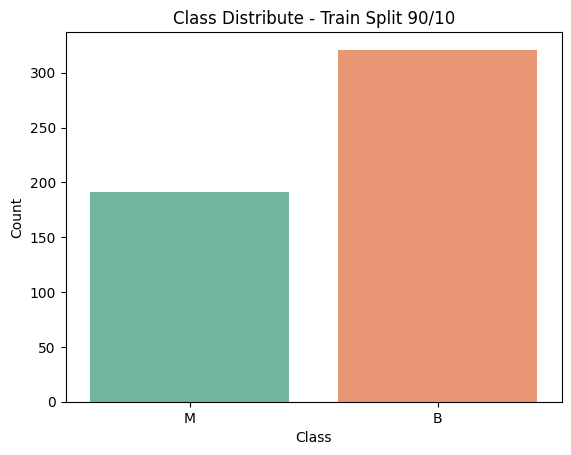

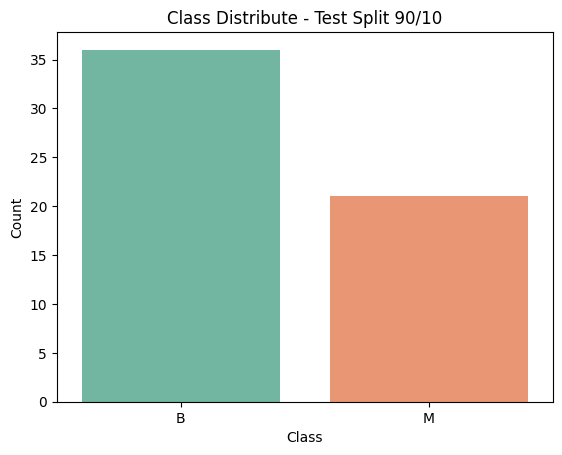

In [5]:
def visualize(y_data,title):
    sns.countplot(x = y_data['Diagnosis'],palette='Set2')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

for idx,(X_train,X_test,y_train,y_test) in enumerate(subsets):
    
    train_size = test_proportion[idx] * 100
    test_size = (1 - test_proportion[idx]) * 100
    visualize(y, 'Class Distribution - Original Dataset')
    visualize(y_train,f'Class Distribute - Train Split {train_size:.0f}/{test_size:.0f}')
    visualize(y_test,f'Class Distribute - Test Split {train_size:.0f}/{test_size:.0f}')


### Decision Tree Construction

Decision Tree: 40/60


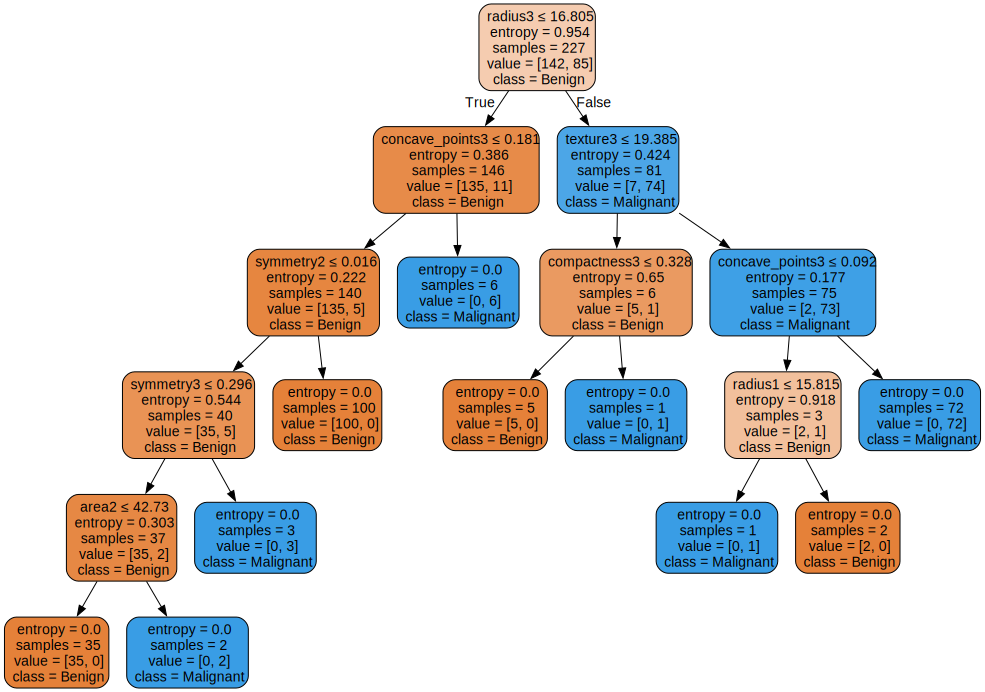

Decision Tree: 60/40


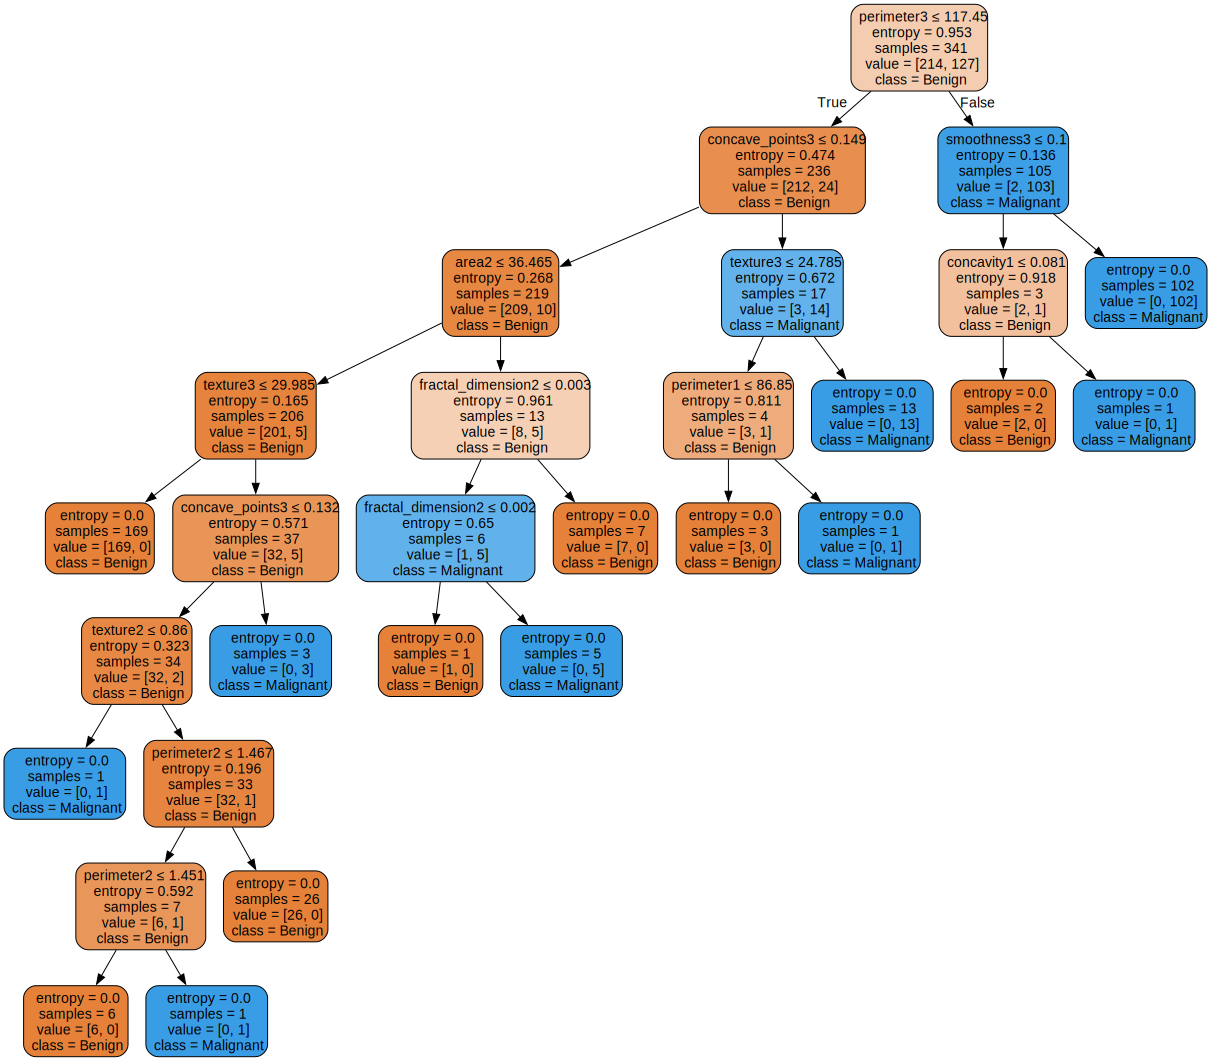

Decision Tree: 80/20


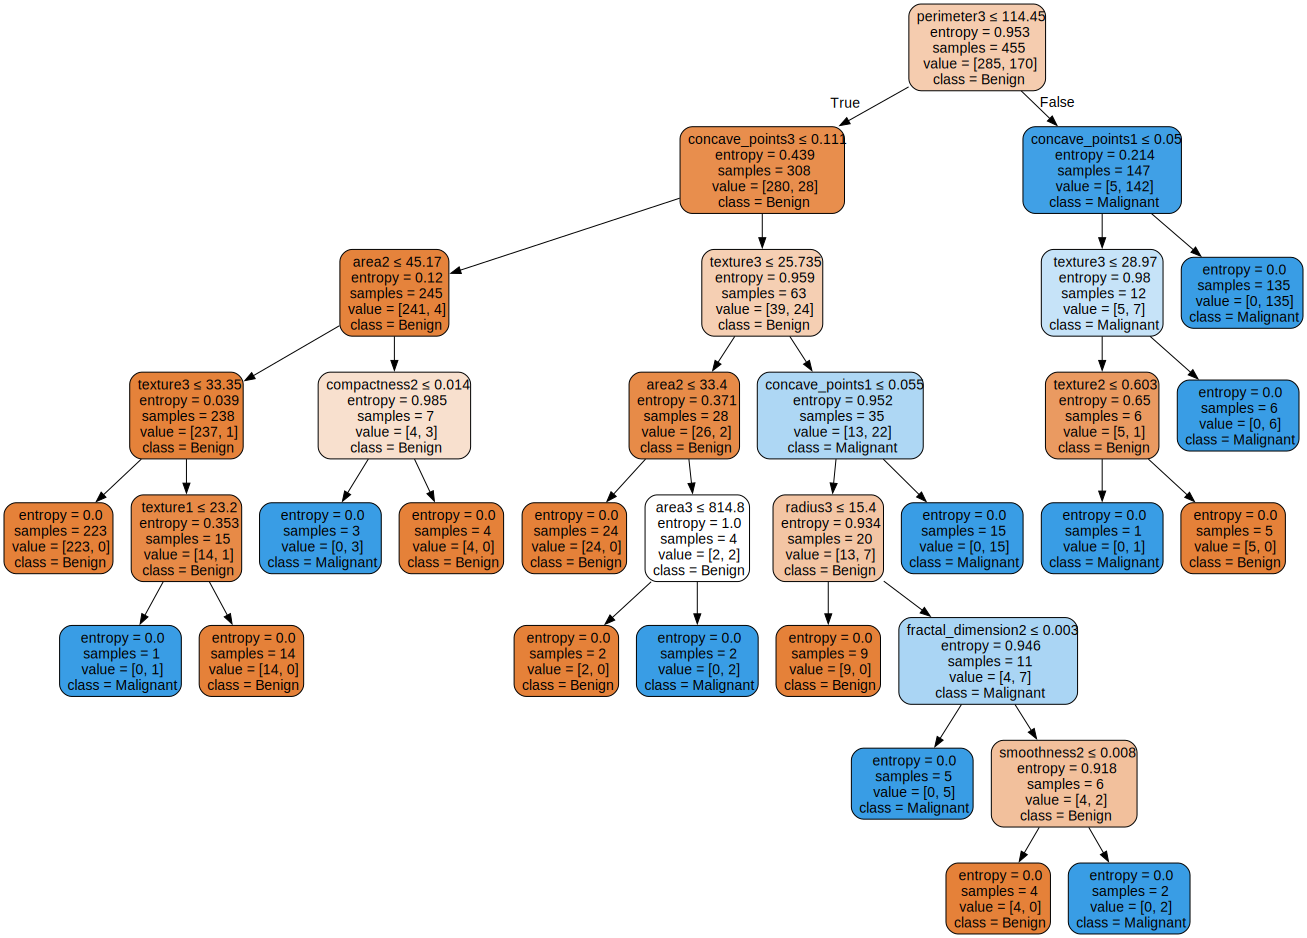

Decision Tree: 90/10


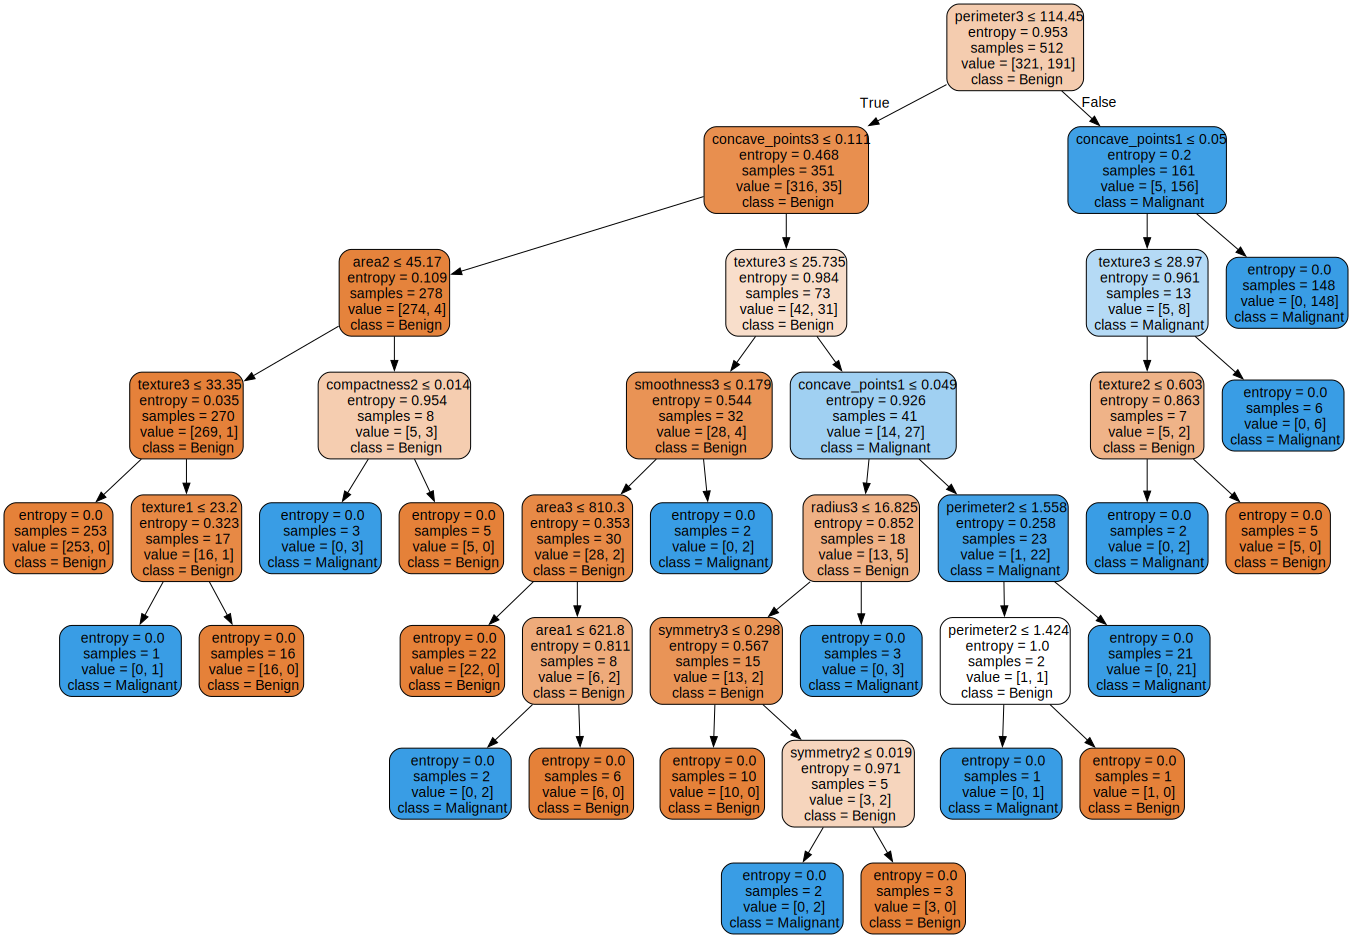

In [ ]:
def build_visualize_tree(X_train,y_train,train_size,depth = None):
    clf = DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth = depth)
    clf = clf.fit(X_train,y_train)

    dot_data = export_graphviz(clf,out_file = None,feature_names= X.columns,class_names= ['Benign','Malignant'],
                               filled= True,rounded = True,special_characters= True
                               )

    graph = graphviz.Source(dot_data)
    display(graph)

for idx,(X_train,X_test,y_train,y_test) in enumerate(subsets):
    train_size = test_proportion[idx]
    print(f'Decision Tree: {train_size*100:.0f}/{(1-train_size)*100:.0f}')
    build_visualize_tree(X_train,y_train,train_size)

### Evaluation

Evaluating the decision tree classifiers: 40/60
              precision    recall  f1-score   support

           B       0.91      0.96      0.93       215
           M       0.92      0.83      0.88       127

    accuracy                           0.91       342
   macro avg       0.91      0.90      0.90       342
weighted avg       0.91      0.91      0.91       342

[[206   9]
 [ 21 106]]


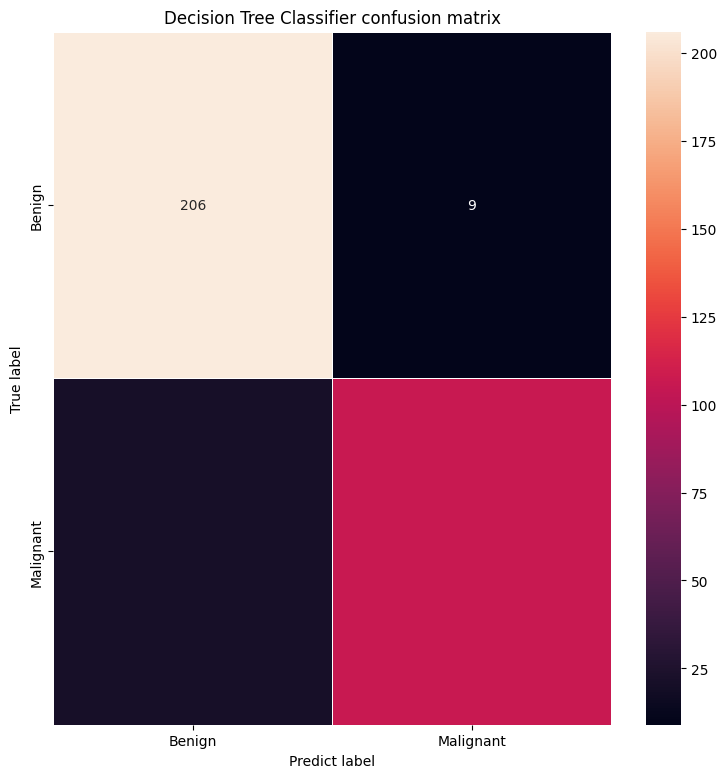

Evaluating the decision tree classifiers: 60/40
              precision    recall  f1-score   support

           B       0.94      0.96      0.95       143
           M       0.93      0.91      0.92        85

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.93       228
weighted avg       0.94      0.94      0.94       228

[[137   6]
 [  8  77]]


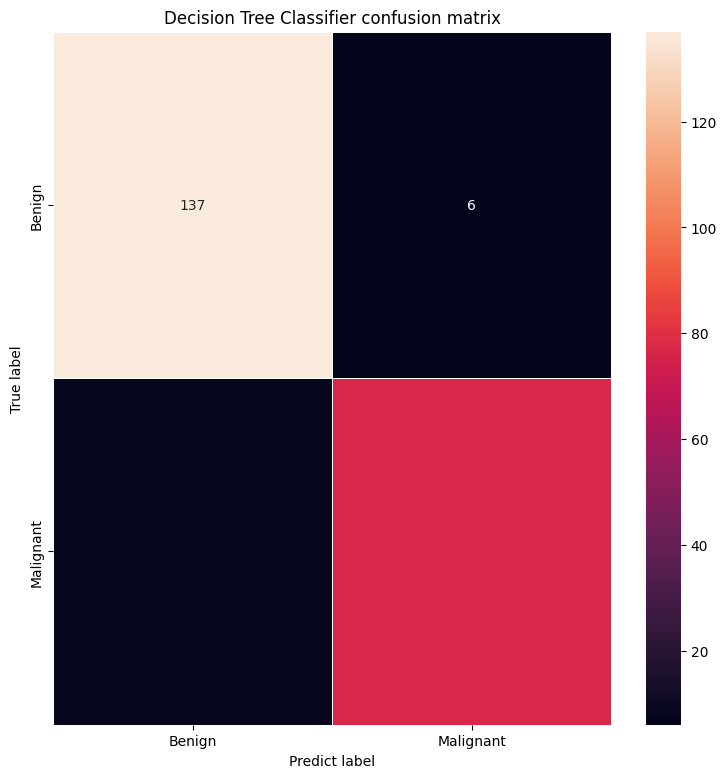

Evaluating the decision tree classifiers: 80/20
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[71  1]
 [ 4 38]]


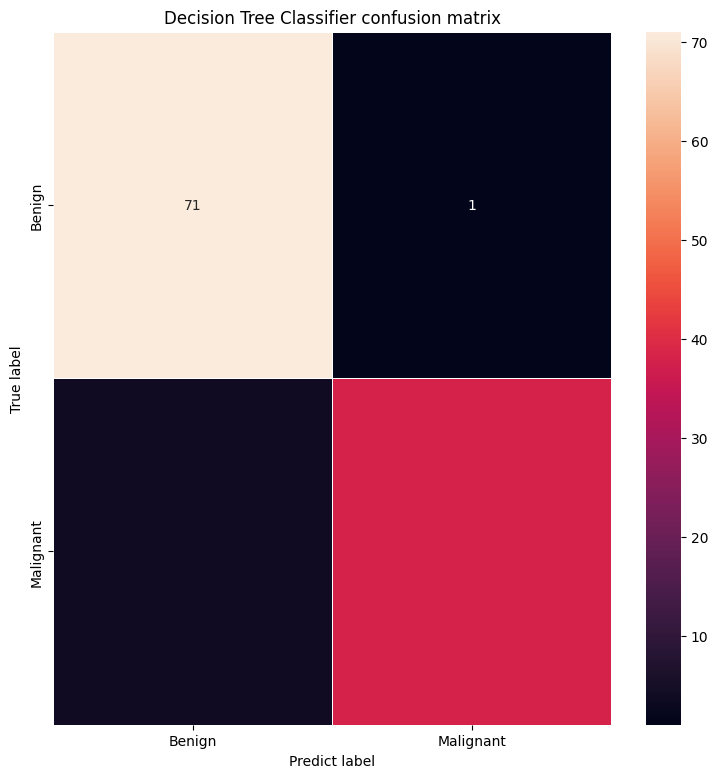

Evaluating the decision tree classifiers: 90/10
              precision    recall  f1-score   support

           B       0.95      0.97      0.96        36
           M       0.95      0.90      0.93        21

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57

[[35  1]
 [ 2 19]]


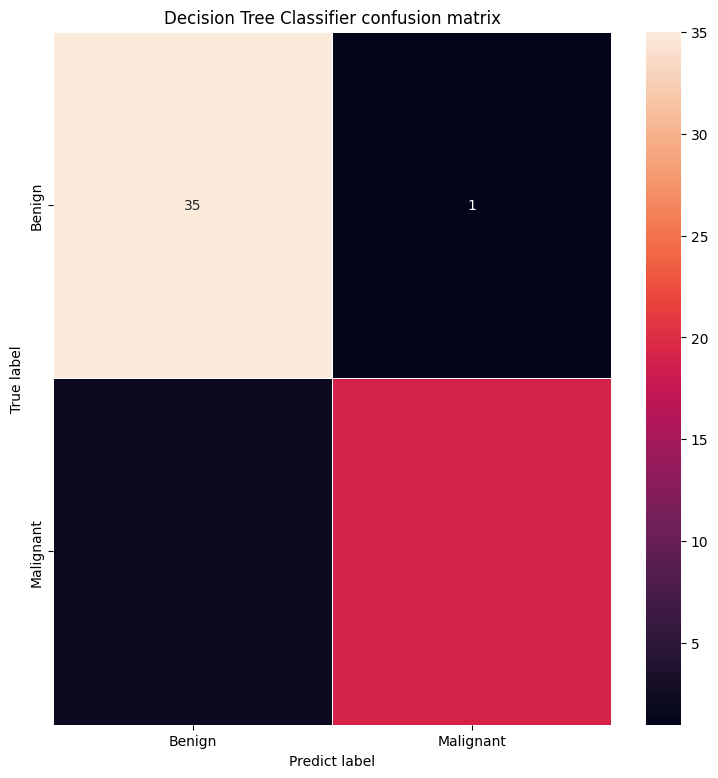

In [7]:

for idx,(X_train,X_test,y_train,y_test) in enumerate(subsets):
    train_size = test_proportion[idx]
    clf = DecisionTreeClassifier(criterion='entropy',random_state=42)
    clf = clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    print(f'Evaluating the decision tree classifiers: {train_size*100:.0f}/{(1-train_size)*100:.0f}')
    print(classification_report(y_test,y_predict))
    cfm = confusion_matrix(y_test,y_predict)
    plt.figure(figsize=(9,9))
    sns.heatmap(cfm,annot=True,fmt ='d',linewidth=.5,xticklabels=["Benign","Malignant"],yticklabels=["Benign","Malignant"])
    plt.title('Decision Tree Classifier confusion matrix')
    plt.xlabel('Predict label')
    plt.ylabel('True label')
    print(cfm)
    plt.show()

### Depth and Accuracy Score

Depth = None


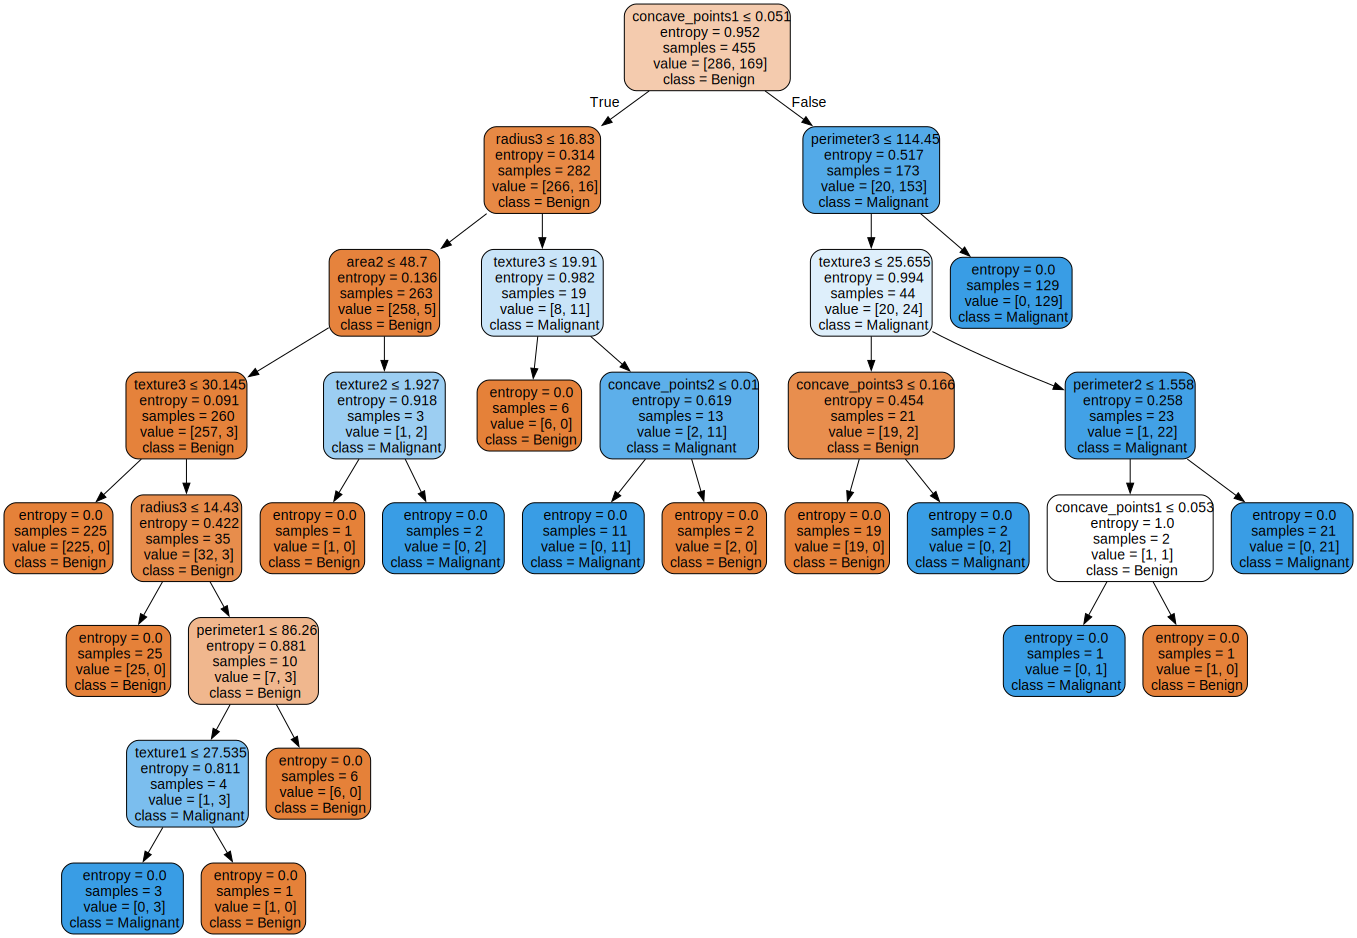

Depth = 2


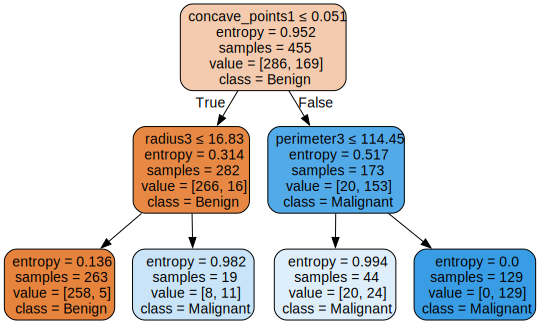

Depth = 3


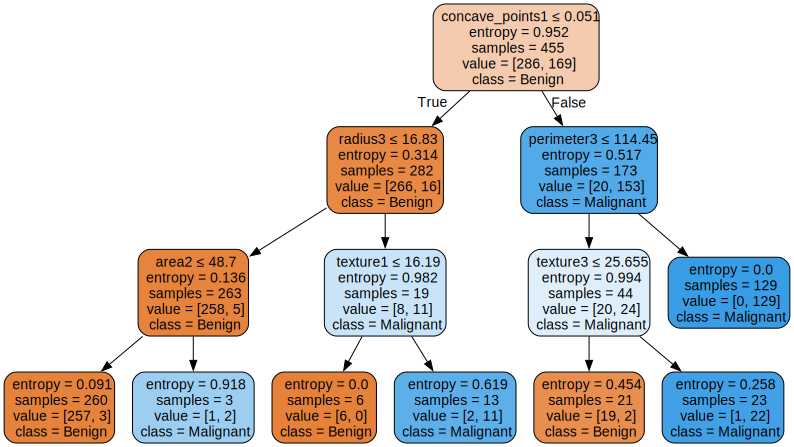

Depth = 4


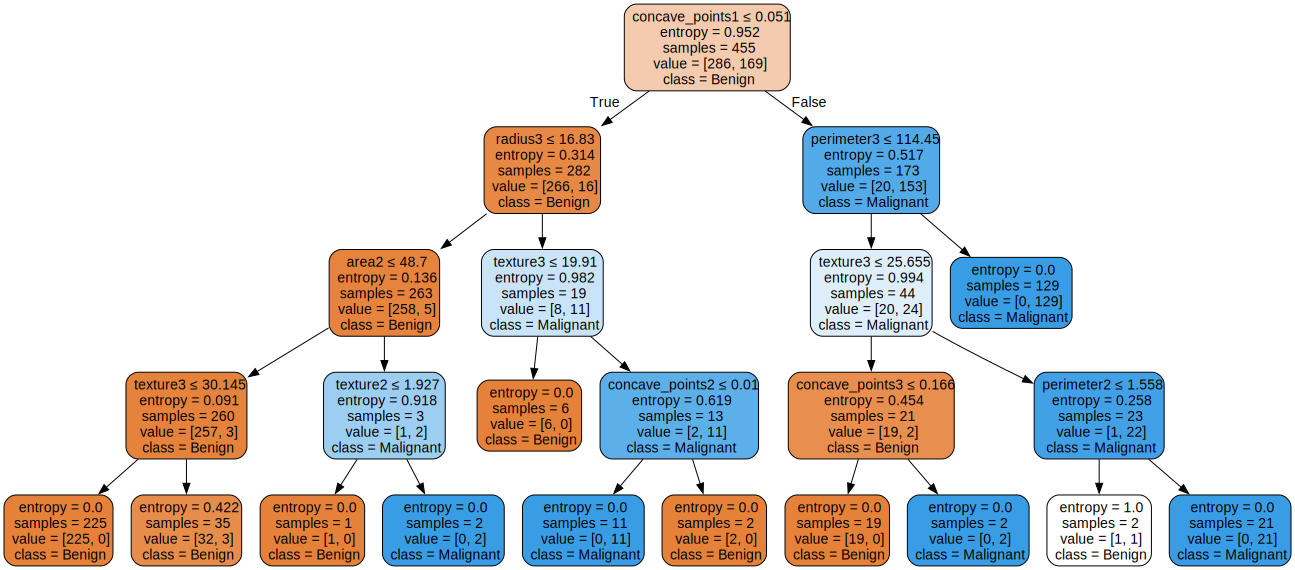

Depth = 5


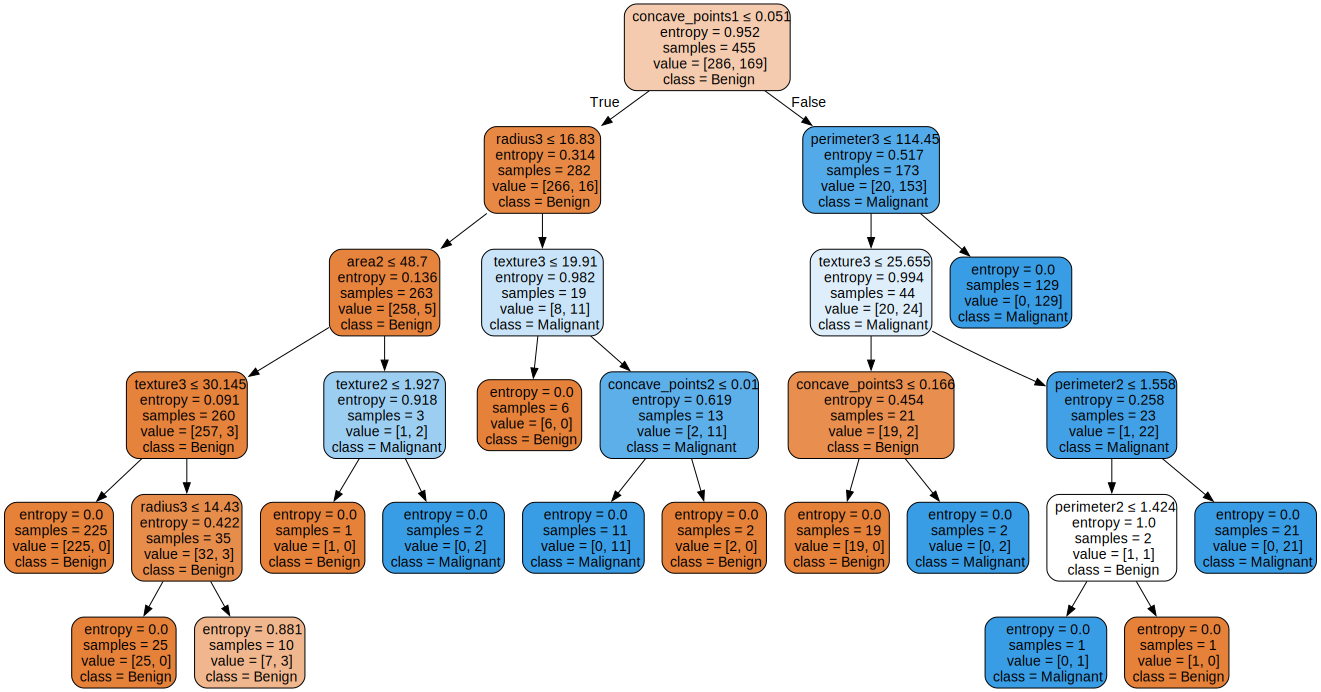

Depth = 6


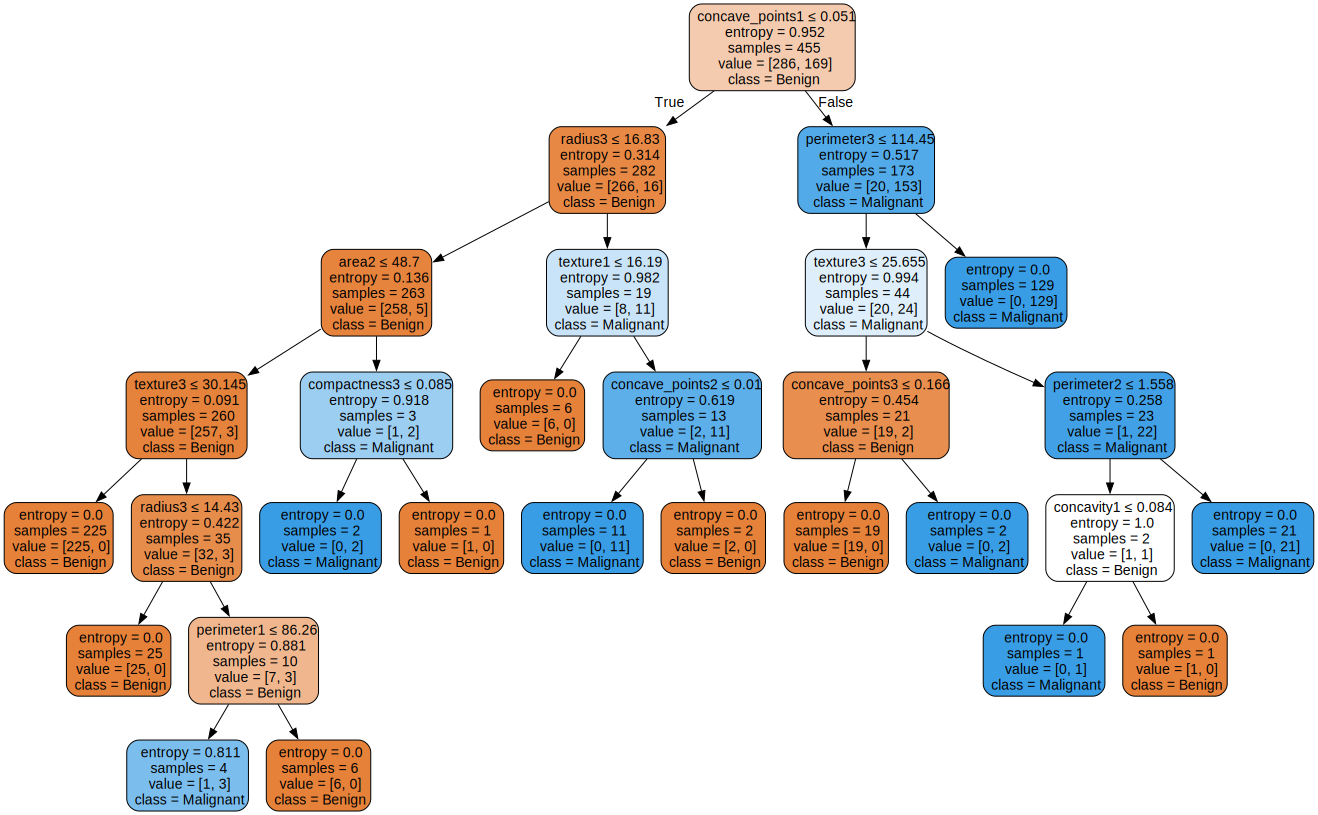

Depth = 7


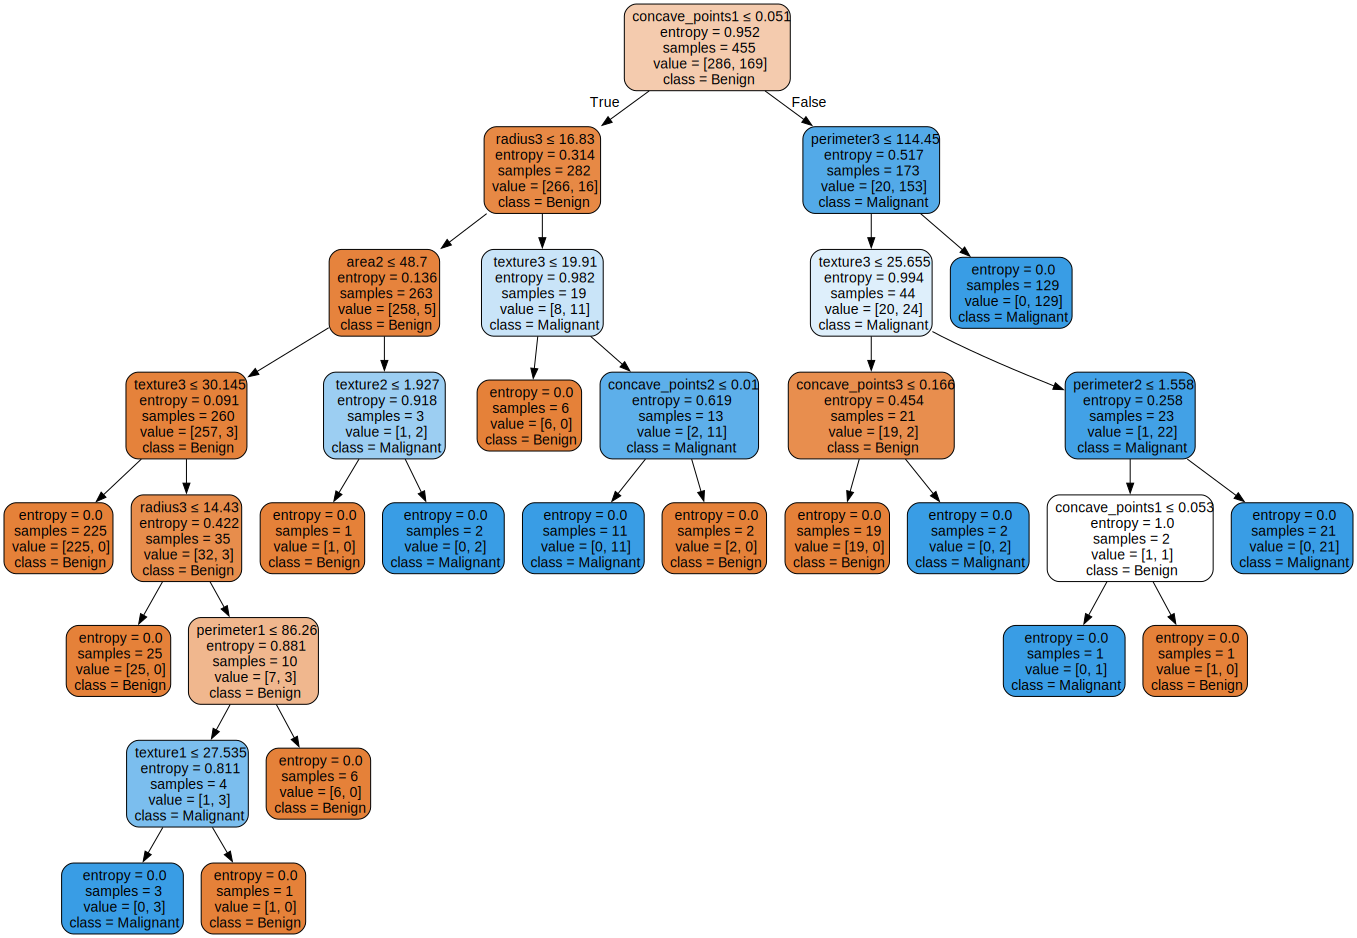

max_depth       NaN       2.0       3.0       4.0       5.0       6.0  \
accuracy   0.947368  0.912281  0.964912  0.947368  0.947368  0.947368   

max_depth       7.0  
accuracy   0.947368  


In [23]:
max_depth = [None,2 ,3 ,4 ,5 ,6 ,7]
accuracy = []
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)
for depth in max_depth:
    print(f'Depth = {depth}')
    build_visualize_tree(X_train,y_train,train_size=0.8,max_depth = depth)
    clf = DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth= depth)
    clf = clf.fit(X_train,y_train)

    y_prec = clf.predict(X_test)

    accuracy.append(accuracy_score(y_test,y_prec))
    
results = pd.DataFrame({
    'max_depth': max_depth,
    'accuracy': accuracy
})
results = results.set_index('max_depth').T

print(results)